### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Employee Attrition Prediction</div></b>
Employee attrition refers to the phenomenon of employees leaving an organization voluntarily or involuntarily. Predicting employee attrition can help organizations proactively identify and address factors that contribute to employee turnover.

Building a predictive model for employee attrition can provide valuable insights to optimize employee retention strategies.

This project aims to develop a machine learning algorithm for accurate and efficient detection of employee attrition.

##### Objectives:
  - To investigate the key features that  affect employee attrition
  - 
To determine the optimal machine learning algorithm for employee attrition prediction.

##### Import major Libraries

In [1]:
# Import major Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
# Import the dataset
data = pd.read_csv("train_data.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### Data Cleaning & Preprosessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [4]:
# Checking for missing values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in our data

In [5]:
# Checking for duplicates

data.duplicated().any().sum()

0

In [6]:
# Check the number unique values in each features
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    731
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1058
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                991
MonthlyRate                 1038
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
data.shape

(1058, 35)

In [9]:
# Descriptive statistic of categorical columns
data.describe(include=["object", "bool"]).T

,count,unique,top,freq
BusinessTravel,1058,3,Travel_Rarely,746
Department,1058,3,Research & Development,701
EducationField,1058,6,Life Sciences,436
Gender,1058,2,Male,620
JobRole,1058,9,Sales Executive,232
MaritalStatus,1058,3,Married,464
Over18,1058,1,Y,1058
OverTime,1058,2,No,751


In [10]:
# Descriptive statistic of numerical columns
data.describe(include=["int64", "float64"]).T

,count,mean,std,min,25%,50%,75%,max
Age,1058.0,37.055766,9.410421,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1058.0,809.542533,408.478049,102.0,465.25,817.5,1168.50,1499.0
DistanceFromHome,1058.0,8.978261,8.040608,1.0,2.00,7.0,13.00,29.0
Education,1058.0,2.879017,1.031442,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1058.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1058.0,731.753308,431.418209,1.0,364.50,723.5,1101.75,1487.0
EnvironmentSatisfaction,1058.0,2.712665,1.092959,1.0,2.00,3.0,4.00,4.0
HourlyRate,1058.0,65.643667,20.324861,30.0,48.00,65.0,83.00,100.0
JobInvolvement,1058.0,2.737240,0.704730,1.0,2.00,3.0,3.00,4.0


#### Data Preprocessing

As part of our preprocessing steps, we will drop some redundant columns

In [11]:
# Drop off some redundant features

data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

#### Exploratory Data Analysis

- Exploratory Data Analysis (EDA) is a crucial step in any data analysis project. It involves summarizing the main characteristics of the data and visualizing them to gain insights.

We will categorize the Age into age groups to help in our EDA

In [12]:
# Group Customer age

def AgeGroup(x):
    if x <= 25:
        return "<=25 Youth"
    elif x <= 40:
        return "26-40 Young Adult"
    elif x<= 50:
        return "41-50 Adult"
    else:
        return ">=51 Elder"
    
# Apply function to the data create a new column(Agegroup)
data["AgeGroup"] = data["Age"].apply(AgeGroup)

data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,41-50 Adult
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,41-50 Adult
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,26-40 Young Adult


- Univariate analysis of the target variable

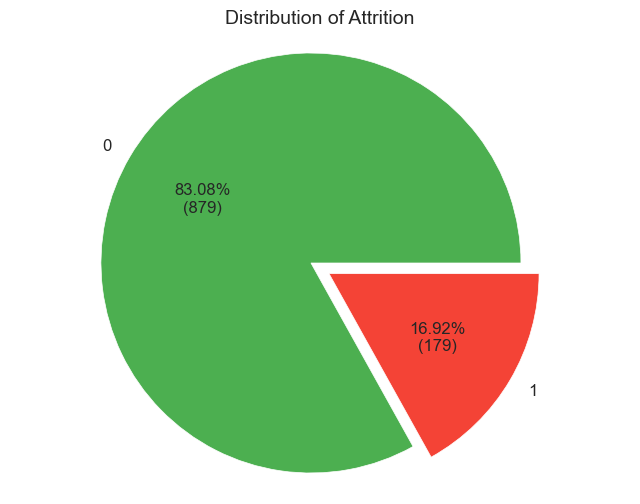

In [14]:
sns.set_style('ticks')
attrition_counts = data['Attrition'].value_counts()
colors = ['#4CAF50', '#F44336']  
labels = attrition_counts.index
explode = (0.1, 0)  

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_format

# Creating the pie chart
plt.figure(figsize=(8,6))
plt.pie(attrition_counts, explode=explode, labels=labels, colors=colors, autopct=autopct_format(attrition_counts), textprops={'fontsize': 12})
plt.title('Distribution of Attrition', fontsize = 14)
plt.axis('equal')

plt.show()

The target variable Attrition is imbalanced, with about 83% of employees not leaving the company (label 0) and 17% leaving (label 1). This imbalance might influence the model's performance, so we'll need to consider techniques like resampling (oversampling the minority class or undersampling the majority class) or using algorithms that can handle imbalanced data.

- Let's seperate the numerical and categorical columns for further analysis

In [15]:
cat_var = data.select_dtypes(include = 'object')
print(cat_var.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'AgeGroup'],
      dtype='object')


In [16]:
num_var = data.select_dtypes(include=['float64','int64'])
print(num_var.columns)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


#### Bivariate Analysis
- Analyze the relationship between each feature and the target variable 

 - ##### Bivariate Analysis of Categorical Features with Attrition

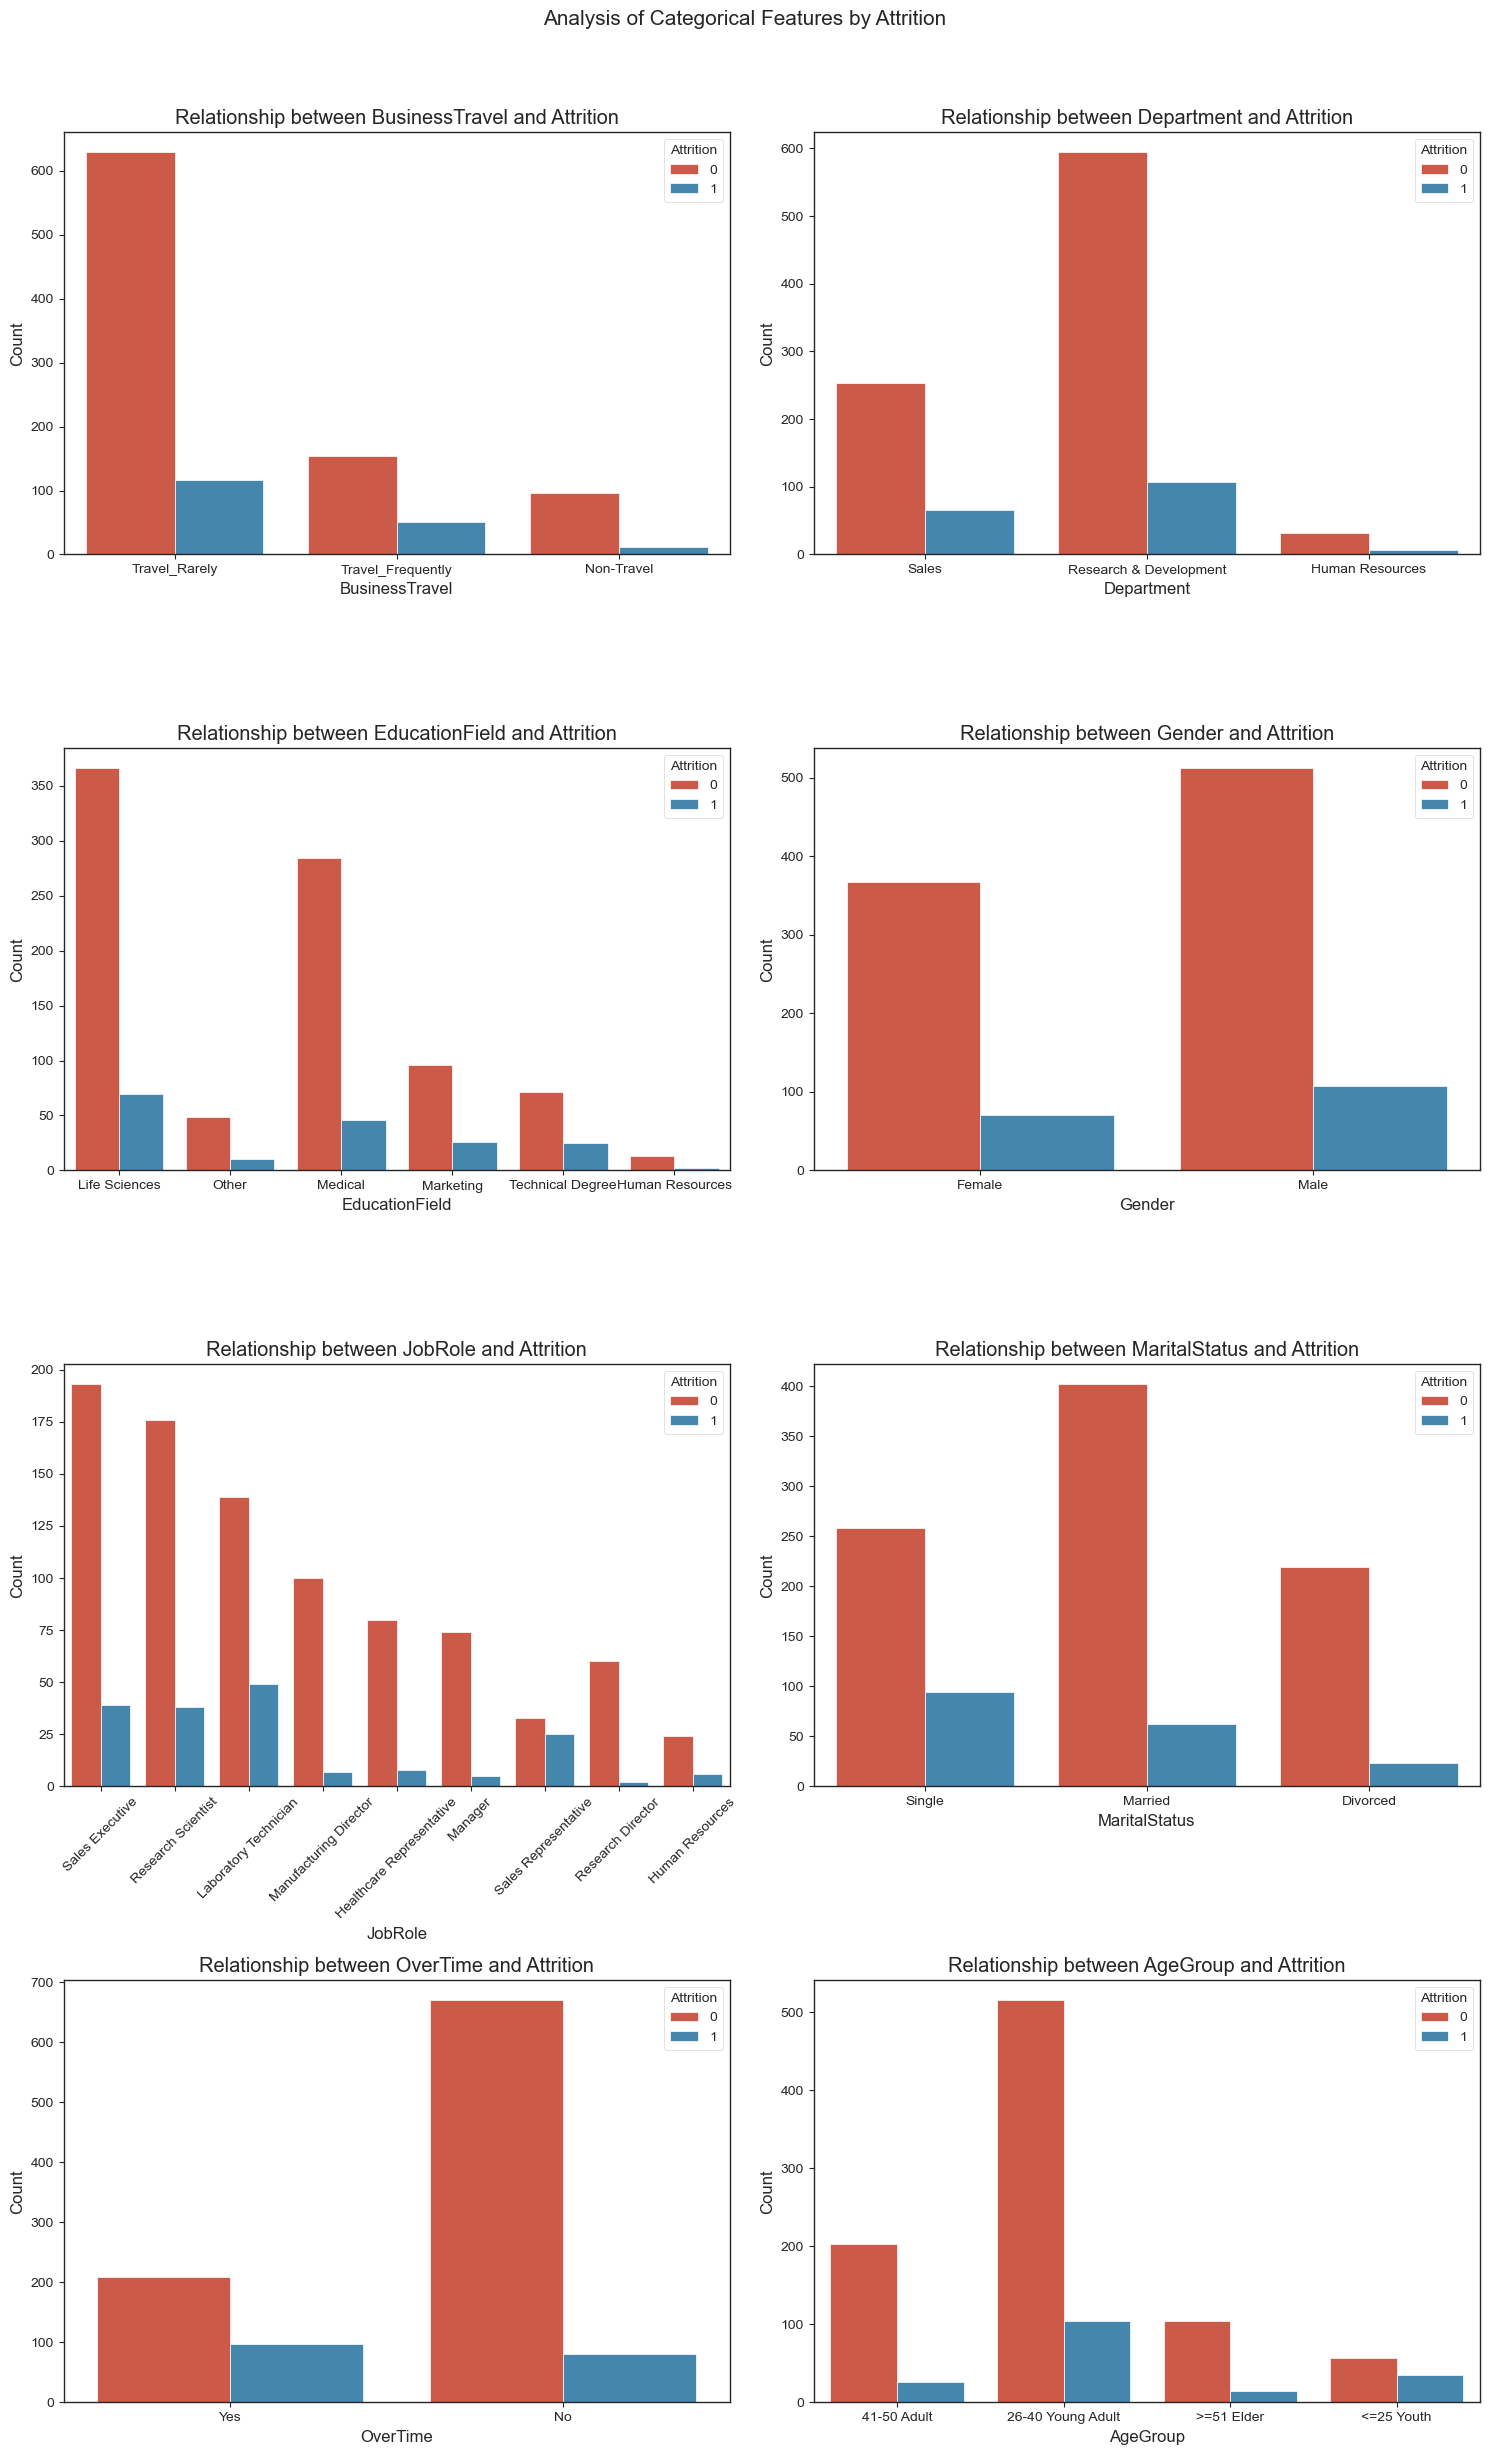

In [16]:
# List of categorical features
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                       'JobRole', 'MaritalStatus', 'OverTime', 'AgeGroup']

# Create a figure with subplots (4 rows x 2 columns to accommodate 8 features)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
axes = axes.flatten()
fig.suptitle('Analysis of Categorical Features by Attrition', fontsize=15)

# Plot bar plots for each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Attrition', data=data, ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and Attrition')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
    # Rotate the x-axis labels for better readability, especially for 'JobRole'
    if feature == 'JobRole':
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].tick_params(axis='x', rotation=0)

# Adjust layout to prevent the title from overlapping with the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


- Business Travel: The bar plot will shows how often employees who travel frequently for business are more prone to attrition compared to those who do not travel or travel rarely.

- Department: Differences in attrition rates across departments can be identified, highlighting areas where employees are more satisfied or dissatisfied. Research & Development has the highest attrition

- Education Field: The plot reveals that employees from certain educational backgrounds are likelier to leave the organization.

- Gender: This plot can help assess whether there is any significant gender disparity in attrition rates.

- Job Role: The analysis of job roles uncovers that specific roles have higher turnover rates, helping HR to target retention strategies more effectively.

- Marital Status: The influence of marital status on attrition can be observed, which might suggest personal factors affecting employee decisions.

- Overtime: A key plot in this analysis, the relationship between overtime work and attrition, could reveal that excessive overtime is a key factor in driving the attrition rate

- Age Group: Understanding attrition across different age groups can help in tailoring engagement strategies for different demographics. Young Adult (26 -40) seems to have the highest attrition rate

- ##### Bivariate Analysis of Numerical Features with Attrition

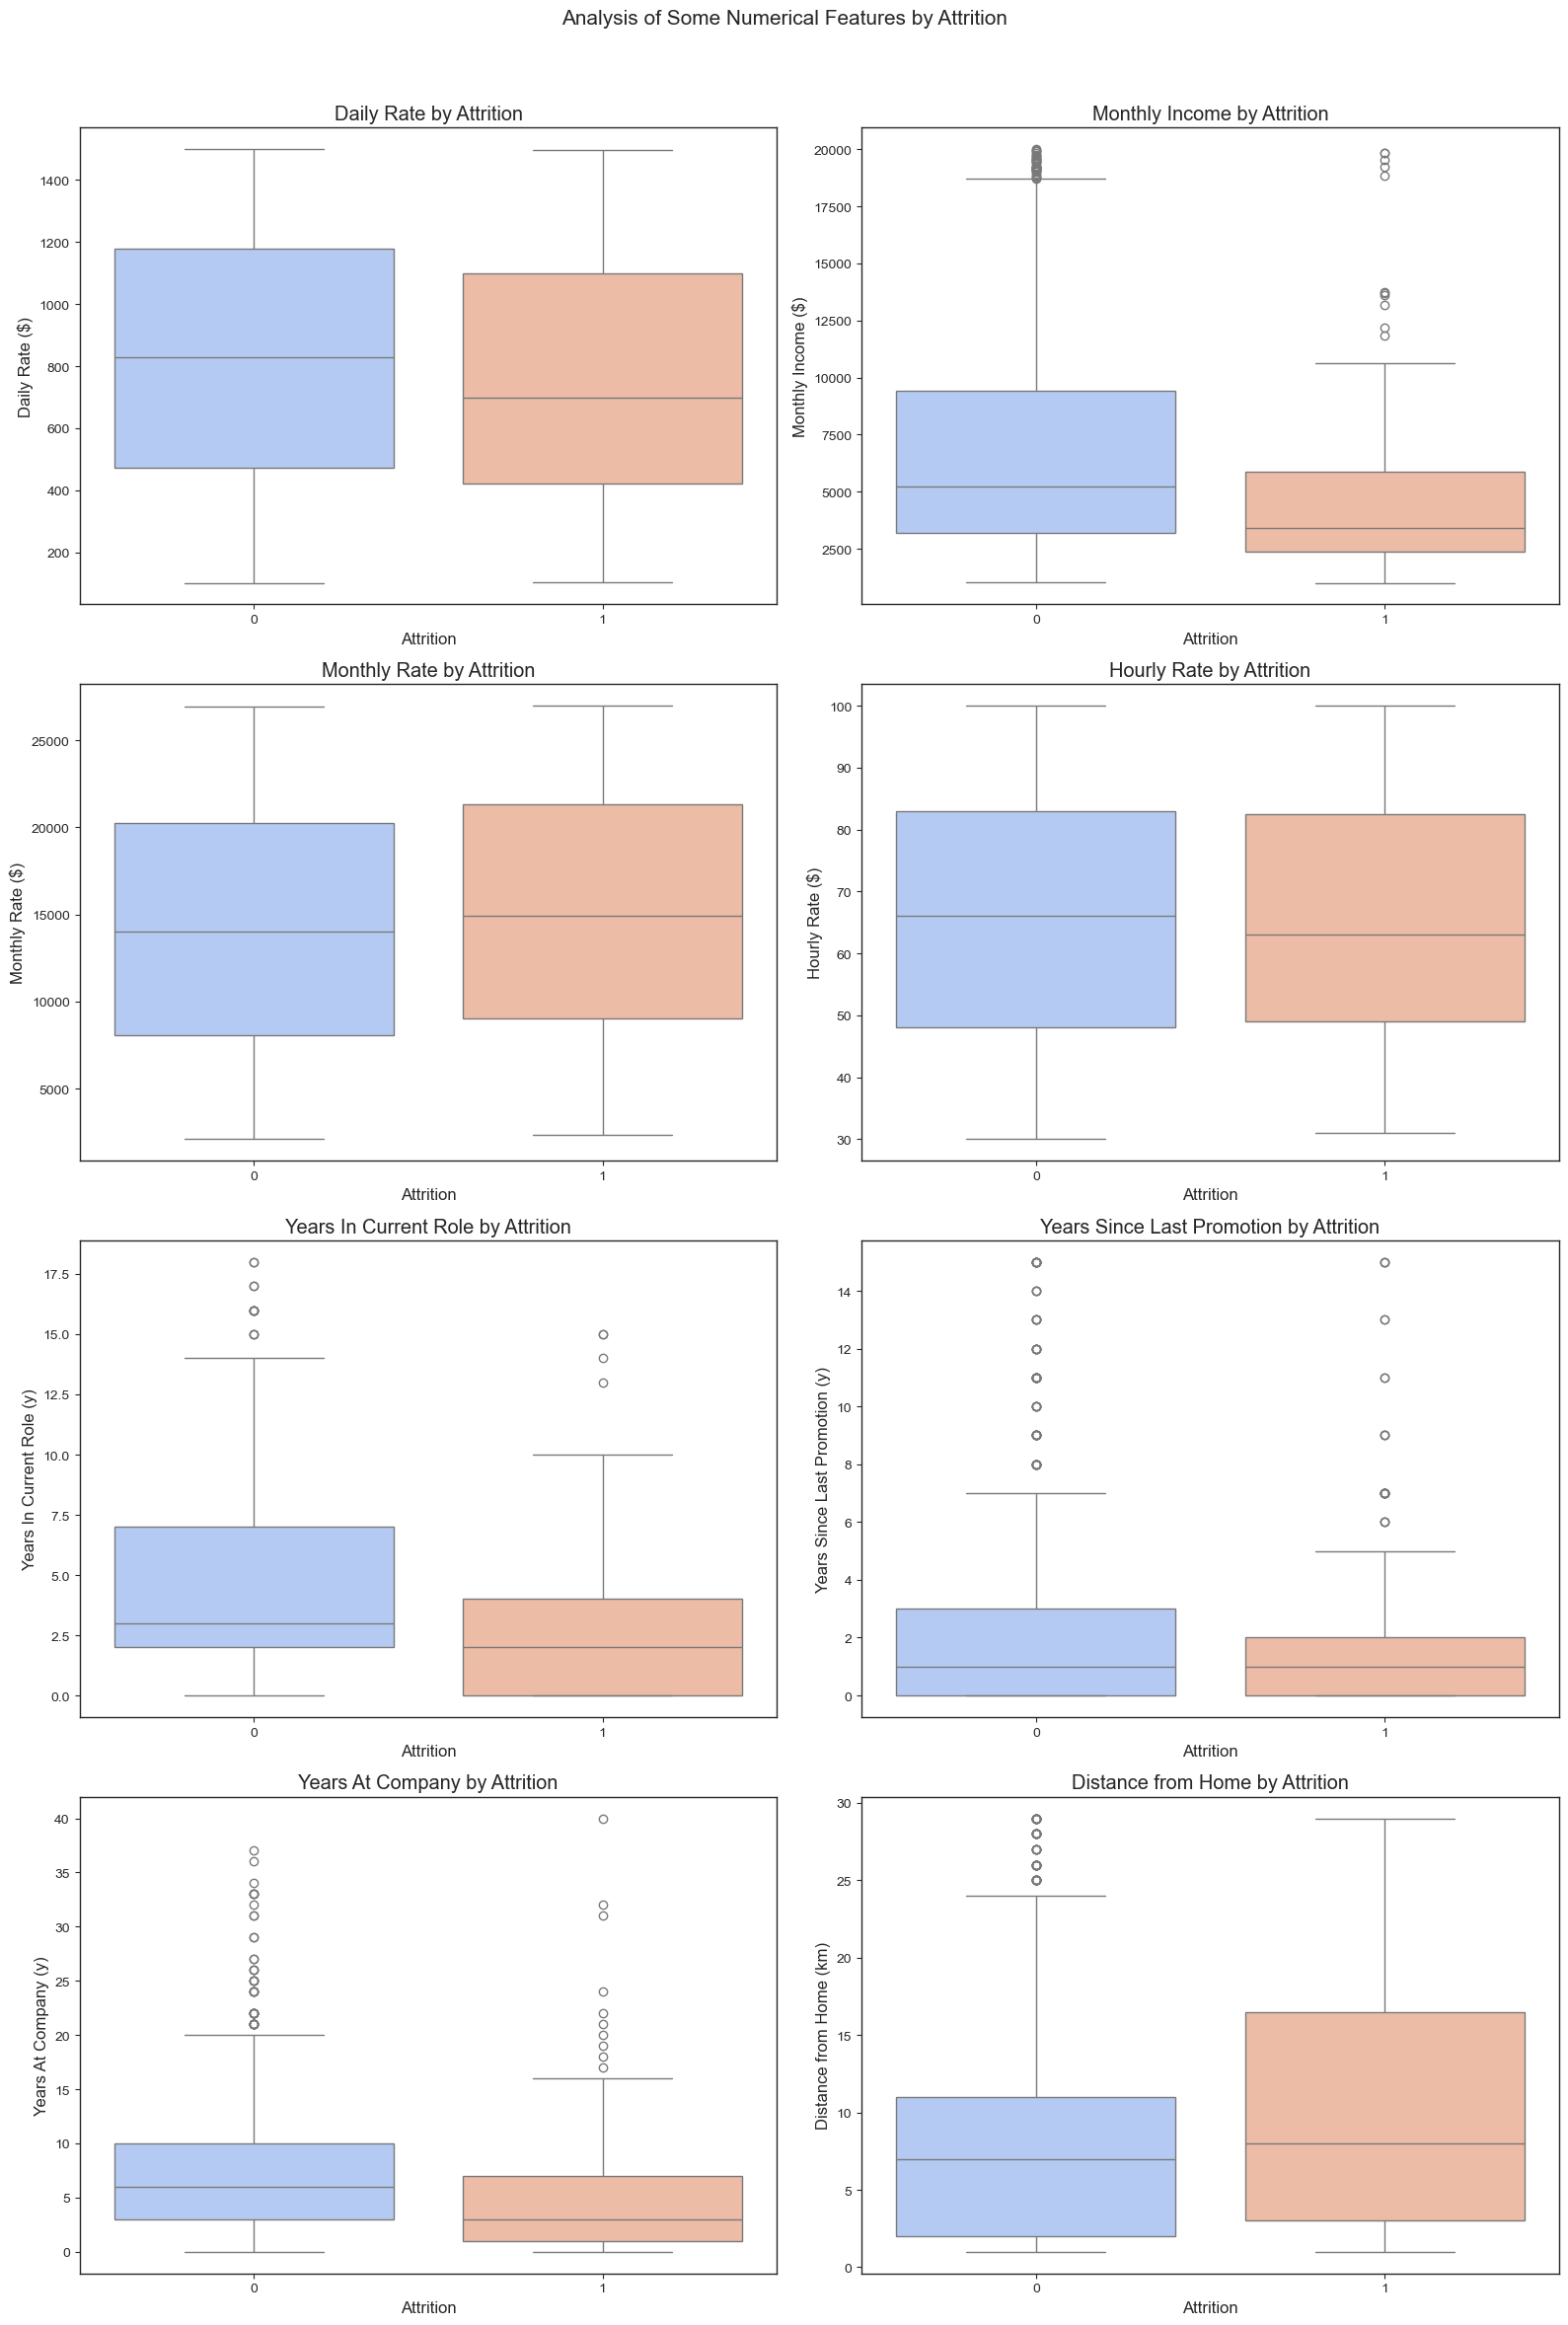

In [24]:
# Create a figure and a grid of subplots (4 rows x 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))
fig.suptitle('Analysis of Some Numerical Features by Attrition', fontsize=15)

# Plot each boxplot in the corresponding subplot
sns.boxplot(x='Attrition', y='DailyRate', data=data, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Daily Rate by Attrition')
axes[0, 0].set_xlabel('Attrition')
axes[0, 0].set_ylabel('Daily Rate ($)')

sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Monthly Income by Attrition')
axes[0, 1].set_xlabel('Attrition')
axes[0, 1].set_ylabel('Monthly Income ($)')

sns.boxplot(x='Attrition', y='MonthlyRate', data=data, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Monthly Rate by Attrition')
axes[1, 0].set_xlabel('Attrition')
axes[1, 0].set_ylabel('Monthly Rate ($)')

sns.boxplot(x='Attrition', y='HourlyRate', data=data, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Hourly Rate by Attrition')
axes[1, 1].set_xlabel('Attrition')
axes[1, 1].set_ylabel('Hourly Rate ($)')

sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=data, palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Years In Current Role by Attrition')
axes[2, 0].set_xlabel('Attrition')
axes[2, 0].set_ylabel('Years In Current Role (y)')

sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data, palette='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title('Years Since Last Promotion by Attrition')
axes[2, 1].set_xlabel('Attrition')
axes[2, 1].set_ylabel('Years Since Last Promotion (y)')

sns.boxplot(x='Attrition', y='YearsAtCompany', data=data, palette='coolwarm', ax=axes[3, 0])
axes[3, 0].set_title('Years At Company by Attrition')
axes[3, 0].set_xlabel('Attrition')
axes[3, 0].set_ylabel('Years At Company (y)')

sns.boxplot(x='Attrition', y='DistanceFromHome', data=data, palette='coolwarm', ax=axes[3, 1])
axes[3, 1].set_title('Distance from Home by Attrition')
axes[3, 1].set_xlabel('Attrition')
axes[3, 1].set_ylabel('Distance from Home (km)')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


- Daily Rate: Employees who did not leave (Attrition = 0) generally have a higher daily rate, with the median around 1,000. Employees who left (Attrition = 1) have a lower median daily rate, approximately $800. The spread of daily rates is wider for employees who did not leave, indicating more variability in their pay.

- Monthly Income: Similar to the daily rate, employees who did not leave have a higher median monthly income (around 7,500). Employees who left have a lower median monthly income, around $5,000. There are several outliers in the monthly income for both groups, particularly for those who did not leave, suggesting that some employees earn significantly more than others.

- Monthly Rate Distribution: Employees who did not leave the company (Attrition = 0) exhibit a higher median monthly rate, approximately 5,500, compared to those who left (Attrition = 1), whose median is around 3,500. This significant difference in median monthly rates suggests that higher compensation may be associated with lower attrition rates.

- Years Since Last Promotion: Employees who did not leave (Attrition = 0) tend to have a higher median number of years since their last promotion, around years. Employees who left (Attrition = 1) have a lower median, close to 0 years, suggesting that they have not been promoted recently. There are several outliers in both groups, particularly for those who left, indicating some employees may have been waiting a long time for a promotion.

- Years At Company: Employees who did not leave have a significantly higher median tenure at the company, around 10 years. Those who left have a lower median tenure, approximately 5 years. This suggests that longer tenure may correlate with lower attrition rates.

- Distance from Home: The median distance from home is similar for both groups, though there may be slight variations. Employees who did not leave have a wider range of distances, indicating that some commute significantly further than others. For those who left, the median distance is slightly less, suggesting that proximity to work may play a role in their decision to leave.

- #### Correlation analysis:
  - Identify multicollinearity and relationships between features and target

<Axes: >

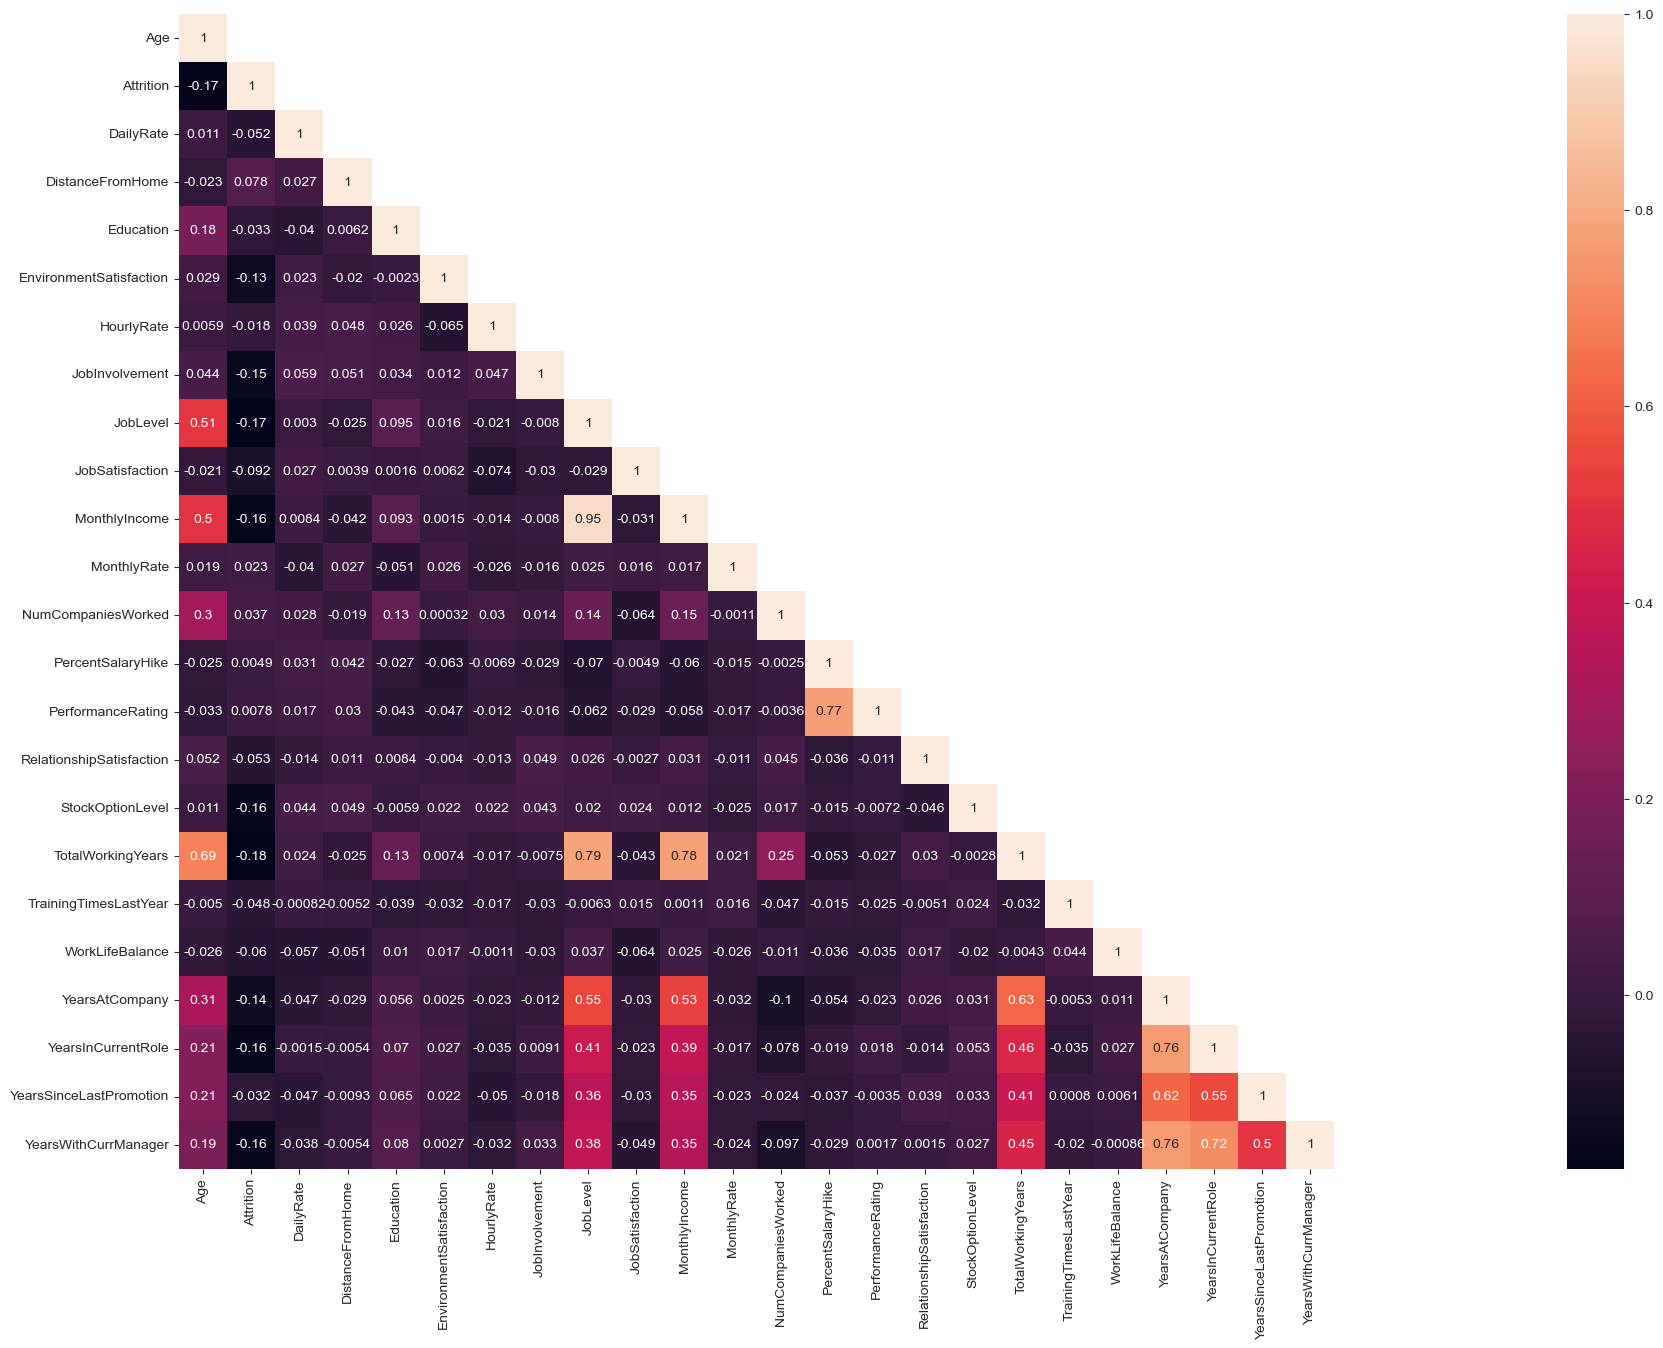

In [26]:
# Computing corrolation of columns
cor_mat = num_var.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False

# making Heat Map to show Correlation to Target Features
fig = plt.gcf()
fig.set_size_inches(60,15)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

The correlation matrix provides insights into the relationship between various employee features and the likelihood of attrition within the organization. The analysis focuses on understanding which factors are most strongly correlated with employee turnover, enabling the identification of key areas to target for improving retention.

#### Key Observations

- **Age (Correlation: 0.17)**
  - There is a weak positive correlation between age and attrition. This suggests that older employees may have a slightly higher likelihood of leaving the organization, though the relationship is not strong.

- **Daily Rate (Correlation: 0.05)**
  - The daily pay rate exhibits a very weak correlation with attrition, indicating that it does not significantly influence employee turnover.

- **Distance From Home (Correlation: 0.07)**
  - The negligible correlation suggests that the distance employees travel to work does not notably affect their likelihood of leaving.

- **Education (Correlation: 0.03)**
  - A weak positive correlation suggests that employees with higher education levels may have a slightly higher attrition rate.

- **Environment Satisfaction (Correlation: -0.13)**
  - There is a strong negative correlation between environment satisfaction and attrition, indicating that employees who are more satisfied with their work environment are less likely to leave.

- **Job Involvement (Correlation: -0.15)**
  - A weak negative correlation suggests that higher job involvement is associated with lower attrition.

- **Job Level (Correlation: -0.17)**
  - A moderate positive correlation indicates that employees at higher job levels may have a higher likelihood of leaving.

- **Job Satisfaction (Correlation: 0.09)**
  - This strong negative correlation highlights that higher job satisfaction is closely linked to lower attrition rates.

- **Monthly Rate (Correlation: 0.023)**
  - A moderate positive correlation suggests that higher monthly rates could be linked to higher attrition.

- **Relationship Satisfaction (Correlation: -0.30)**
  - A moderate negative correlation suggests that better workplace relationships are associated with lower attrition.

- **Total Working Years (Correlation: -0.19)**
  - A weak negative correlation indicates that more years of experience may be associated with lower attrition.

- **Work-Life Balance (Correlation: -0.06)**
  - A weak negative correlation indicates that better work-life balance is associated with lower attrition rates.

- **Years at Company (Correlation: -0.14)**
  - A moderate negative correlation suggests that employees who have been with the company longer are less likely to leave.

- **Years Since Last Promotion (Correlation: -0.031)**
  - A weak negative correlation indicates that employees who have waited longer for a promotion are more likely to leave.

- **Years With Current Manager (Correlation: -0.16)**
  - A weak negative correlation suggests that longer tenure with a manager may correlate with lower attrition.

#### Summary
The most significant factors correlated with attrition include **Job Satisfaction**, **Environment Satisfaction**, and **Years Since Last Promotion**. These findings emphasize the critical role of employee satisfaction and career advancement opportunities in reducing turnover rates. Prioritizing initiatives that enhance job satisfaction, workplace environment, and clear pathways for career progression can be effective strategies for improving employee retention.

##### Multivariate Analysis

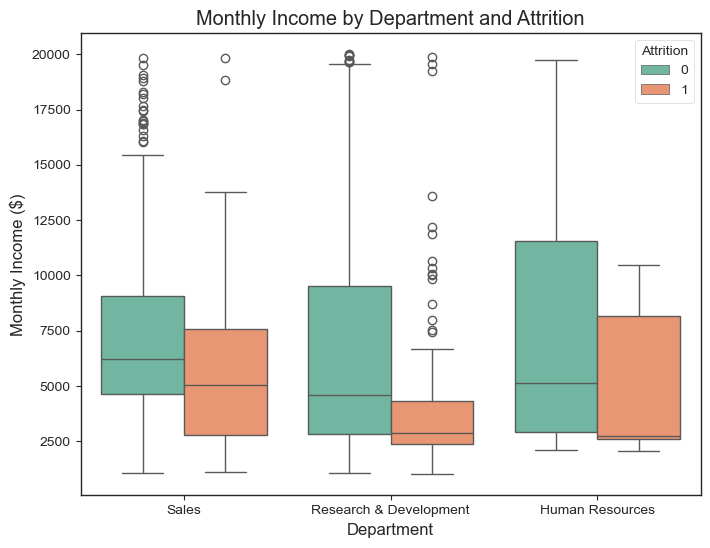

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Department', y='MonthlyIncome', hue = 'Attrition', data=data, palette='Set2')
plt.title('Monthly Income by Department and Attrition')
plt.xlabel('Department')
plt.ylabel('Monthly Income ($)')
plt.legend(title='Attrition')

plt.show()

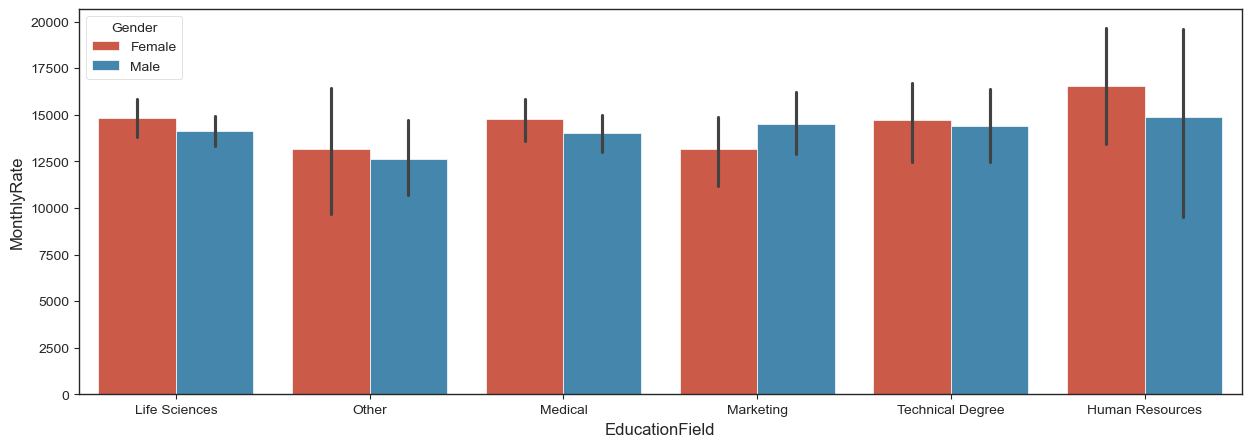

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x="EducationField", y='MonthlyRate', data=data, hue='Gender')

plt.show()

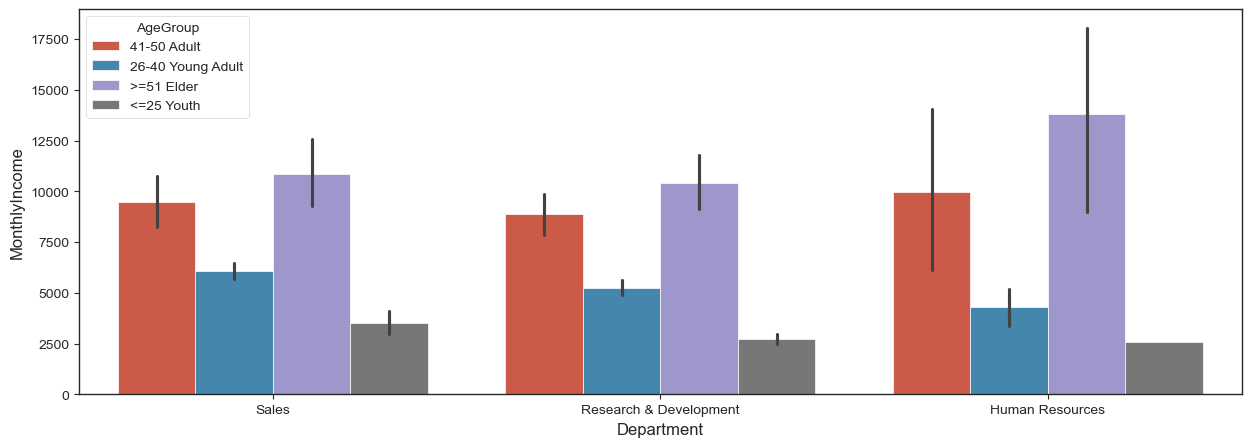

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x="Department", y='MonthlyIncome', data=data, hue='AgeGroup')

plt.show()